In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
mush_data = pd.read_csv('D:\\AnacondaData\\Mushroom\\training_mush.csv')

In [3]:
mush_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [4]:
X_train = mush_data.drop('class', axis=1)
y_train = mush_data['class']

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
clf = RandomForestClassifier(random_state=0)

In [7]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
grid_clf = GridSearchCV(clf, parametrs, cv=3, n_jobs=-1)

In [10]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [11]:
grid_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [12]:
best_clf = grid_clf.best_estimator_

In [13]:
feature_importances = best_clf.feature_importances_

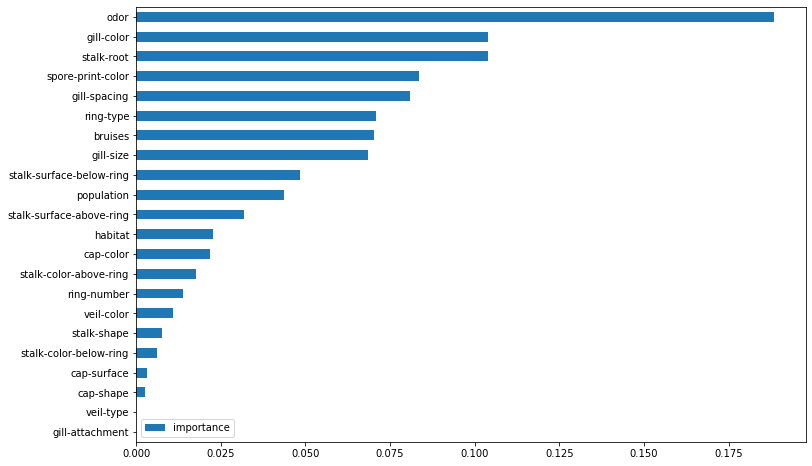

In [14]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [15]:
testing_mush_data = pd.read_csv('D:\\AnacondaData\\Mushroom\\testing_mush.csv')

In [16]:
testing_mush_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [18]:
X_test = testing_mush_data

In [19]:
y_pred = best_clf.predict(X_test)

In [23]:
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [24]:
pd.Series(y_pred).value_counts()

0    1055
1     976
dtype: int64

In [25]:
y_true = pd.read_csv('D:\\AnacondaData\\Mushroom\\testing_y_mush.csv')

In [29]:
from sklearn.metrics import confusion_matrix

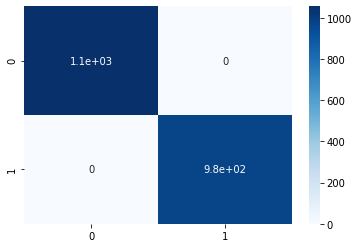

In [30]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")